# LSTM

# Libraries

In [80]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split, KFold, cross_val_score # updated import for cross validation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # for normalization
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

## for Deep-learning:
import keras
from keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D # updated import for Conv1D and MaxPooling1D
from keras.models import Sequential
from keras.utils import to_categorical # updated import for to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
import itertools

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [45]:
df1=pd.read_csv("AAPL.csv")
df2=pd.read_csv("AMD.csv")

In [46]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [47]:
df2

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800
...,...,...,...,...,...,...,...
10093,2020-03-26,45.779999,47.500000,45.400002,47.500000,47.500000,73680200
10094,2020-03-27,46.320000,47.980000,45.900002,46.580002,46.580002,74599200
10095,2020-03-30,47.240002,48.459999,46.660000,47.860001,47.860001,68486600
10096,2020-03-31,47.930000,48.529999,45.160000,45.480000,45.480000,83483700


Mari kita combine kedua data set tersebut

In [48]:
# Concatenate along rows (stack vertically)
df_combined = pd.concat([df1, df2], axis=0)


In [49]:
df_combined.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [50]:
used_data=df_combined[["Date","Close"]]

In [51]:
used_data

,Date,Close
0,1980-12-12,0.513393
1,1980-12-15,0.486607
2,1980-12-16,0.450893
3,1980-12-17,0.462054
4,1980-12-18,0.475446
...,...,...
10093,2020-03-26,47.500000
10094,2020-03-27,46.580002
10095,2020-03-30,47.860001
10096,2020-03-31,45.480000


Data Sudah siap, mari kita lakukan data Exploration

In [52]:
used_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20007 entries, 0 to 10097
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20007 non-null  object 
 1   Close   20007 non-null  float64
dtypes: float64(1), object(1)
memory usage: 468.9+ KB


Fitur yang digunakan hanya 2 fitur sesuai dengan yang dibutuhkan. Oleh karena itu mari kita ubah terlebih dahulu untuk mengubah date time.

# Pra-Processing Data #1

In [53]:
used_data['Date'] = pd.to_datetime(used_data['Date'])
used_data = used_data[used_data['Date'].dt.weekday < 5]
#ini menyesuakian used_data untuk memfilter date dari hari senin - jumat!

C:\Users\USER\AppData\Local\Temp\ipykernel_1400\3074513483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_data['Date'] = pd.to_datetime(used_data['Date'])


In [54]:
used_data.isna().sum()

Date     0
Close    0
dtype: int64

Tidak terdapat missing value data aman

# EDA

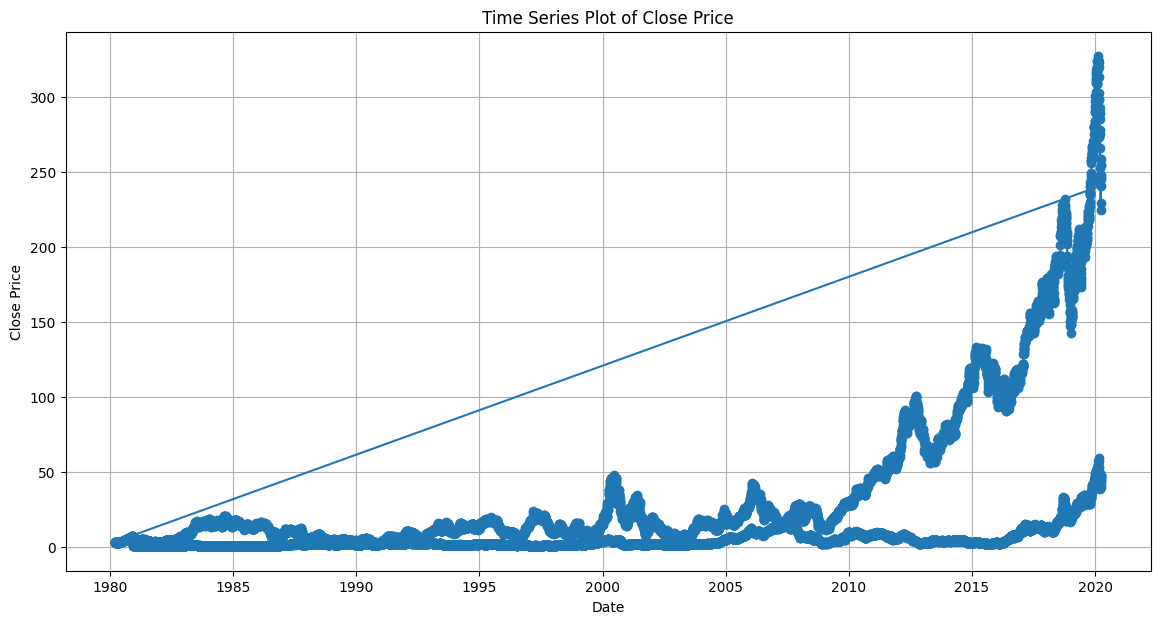

In [55]:
plt.figure(figsize=(14, 7))
plt.plot(used_data['Date'], used_data['Close'], marker='o', linestyle='-')
plt.title('Time Series Plot of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [56]:
print("\nStatistik deskriptif:")
print(used_data.describe())


Statistik deskriptif:
                                Date         Close
count                          20007  20007.000000
mean   2000-05-22 08:30:56.950067584     21.813302
min              1980-03-17 00:00:00      0.196429
25%              1990-06-21 00:00:00      1.744286
50%              2000-05-15 00:00:00      7.050000
75%              2010-04-26 12:00:00     16.125000
max              2020-04-01 00:00:00    327.200012
std                              NaN     42.923664


Count: Menunjukkan jumlah entri non-null dalam kolom. Misalnya, jumlah total entri adalah 20007.

Mean: Ini adalah nilai rata-rata dari kolom. Misalnya, rata-rata nilai dalam kolom tersebut adalah sekitar 21.813302.

Min: Menunjukkan nilai terkecil dalam kolom. Misalnya, nilai minimum adalah 0.196429.

25% (Q1): Ini adalah kuartil pertama atau nilai yang membagi data menjadi seperempat bagian terkecil. Misalnya, 25% data memiliki nilai kurang dari atau sama dengan 1.744286.

50% (Q2): Ini adalah median atau nilai tengah dalam data. Misalnya, 50% data memiliki nilai kurang dari atau sama dengan 7.050000.

75% (Q3): Ini adalah kuartil ketiga atau nilai yang membagi data menjadi tiga perempat bagian terkecil. Misalnya, 75% data memiliki nilai kurang dari atau sama dengan 16.125000.

Max: Ini adalah nilai terbesar dalam kolom. Misalnya, nilai maksimum adalah 327.200012.

Std (Standard Deviation): Ini adalah ukuran dispersi atau sebaran data dari rata-rata. Misalnya, standar deviasi sekitar 42.923664 menunjukkan bahwa nilai dalam kolom bervariasi sekitar nilai rata-ratanya sekitar 42.923664.

Text(0.5, 1.0, 'Correlation Heatmap')

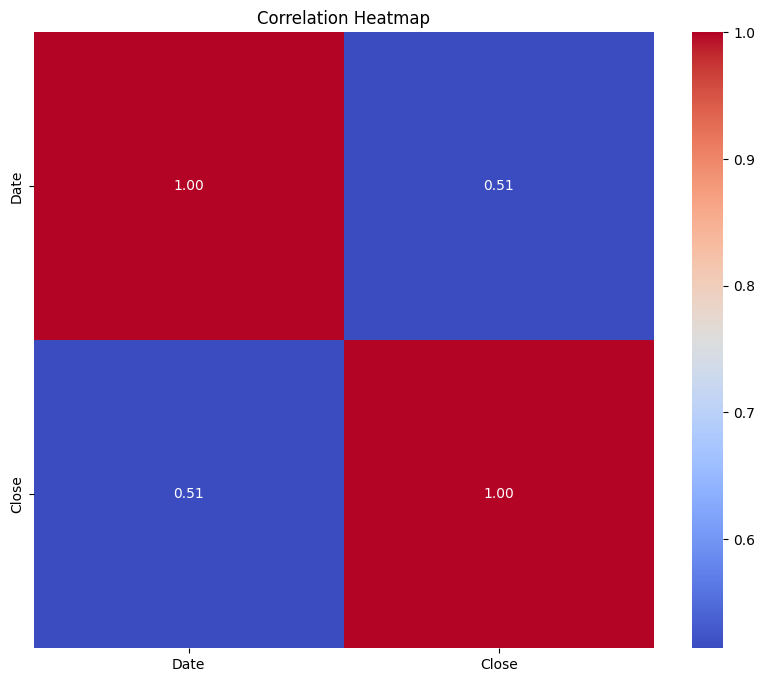

In [57]:
correlation_matrix = used_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

# Praprocessing data #2

In [65]:
def create_sequences_with_date(data, window_size, horizon):
    X, y, dates = [], [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data['Close'].iloc[i:i+window_size].values)  # Input (window_size days)
        y.append(data['Close'].iloc[i+window_size:i+window_size+horizon].values)  # Output (horizon days)
        dates.append(data['Date'].iloc[i+window_size+horizon-1])  # Tanggal terakhir dari sequence
    return np.array(X), np.array(y), np.array(dates)

window_size = 5
horizon = 1


In [66]:
# Buat sequences dengan menggunakan fungsi baru
X, y, dates = create_sequences_with_date(used_data, window_size, horizon)

In [68]:
# Normalisasi data jika diperlukan
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


# Data Splitting

In [69]:
# Ukuran setiap bagian (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp, dates_train, dates_temp = train_test_split(X_scaled, y_scaled, dates, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test, dates_val, dates_test = train_test_split(X_temp, y_temp, dates_temp, test_size=0.5, random_state=42)

In [70]:
print(f"Train set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")

Train set: 16001 samples
Validation set: 2000 samples
Test set: 2001 samples


# LSTM

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Definisi model baseline
model_baseline = Sequential()
model_baseline.add(LSTM(units=50, activation='relu', input_shape=(window_size, 1)))
model_baseline.add(Dense(units=1))  # Output layer dengan 1 node

# Compile model
model_baseline.compile(optimizer='adam', loss='mse')

# Tampilkan ringkasan model
model_baseline.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0049 - val_loss: 2.5429e-05
Epoch 2/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3434e-04 - val_loss: 2.3034e-05
Epoch 3/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.2944e-05 - val_loss: 2.1685e-05
Epoch 4/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.6247e-05 - val_loss: 2.1304e-05
Epoch 5/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1835e-04 - val_loss: 2.0447e-05
Epoch 6/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.4612e-05 - val_loss: 2.4207e-05
Epoch 7/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7580e-04 - val_loss: 1.8837e-05
Epoch 8/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.7112e-05 - val_loss: 1.8828e-05
Epoch 9/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.2729e-05 - val_loss: 5.8931e-05
Epoch 10/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1080e-05 - val_loss: 1.8647e-05
Epoch 11/50
501/501 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.

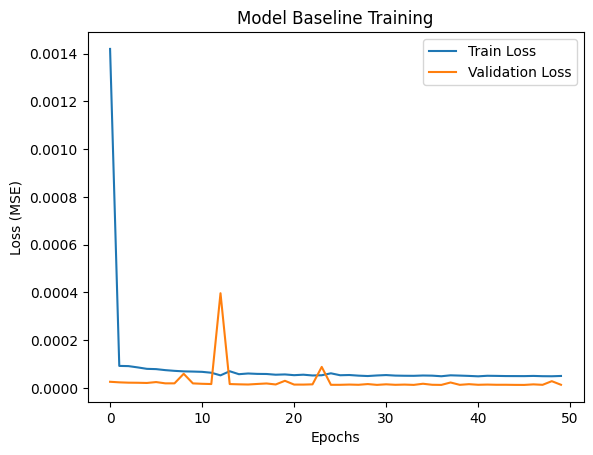

In [85]:
# Contoh pelatihan model
history_baseline = model_baseline.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Plot loss
plt.plot(history_baseline.history['loss'], label='Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.title('Model Baseline Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [96]:
# Modifikasi dengan penambahan layer LSTM dan dropout
model_modifikasi = Sequential()
model_modifikasi.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model_modifikasi.add(LSTM(units=50, activation='relu'))
model_modifikasi.add(Dense(units=1))

# Compile model dengan learning rate yang disesuaikan
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_modifikasi.compile(optimizer=optimizer, loss='mse')

# Tampilkan ringkasan model yang dimodifikasi
model_modifikasi.summary()


c:\Users\USER\Documents\DeepLearning\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 5, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:

# Evaluasi model baseline pada test set
y_pred_baseline = model_baseline.predict(X_test)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100

print("Baseline Model:")
print(f"RMSE: {rmse_baseline}")
print(f"MAE: {mae_baseline}")
print(f"MAPE: {mape_baseline}%")

# Evaluasi model yang dimodifikasi pada test set
y_pred_modifikasi = model_modifikasi.predict(X_test)
rmse_modifikasi = np.sqrt(mean_squared_error(y_test, y_pred_modifikasi))
mae_modifikasi = mean_absolute_error(y_test, y_pred_modifikasi)
mape_modifikasi = np.mean(np.abs((y_test - y_pred_modifikasi) / y_test)) * 100

print("\nModel yang Dimodifikasi:")
print(f"RMSE: {rmse_modifikasi}")
print(f"MAE: {mae_modifikasi}")
print(f"MAPE: {mape_modifikasi}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step
Baseline Model:
RMSE: 0.0038248840913465264
MAE: 0.001356901096037386
MAPE: 6.159865708331895%
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Model yang Dimodifikasi:
RMSE: 0.14958539354884656
MAE: 0.06701366239518228
MAPE: 101.09557885207028%
